In [200]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random
import seaborn as sns
import time
import itertools
from itertools import permutations

## 1. Definindo cenários

### 1.1. Define 3 matrizes para problema

#### Matriz Complexa

In [176]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

#### Matriz Simples

In [177]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

#### Matriz Extra Simples

In [178]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

### 1.2. Plota Matrizes

#### Plota Matriz Complexa

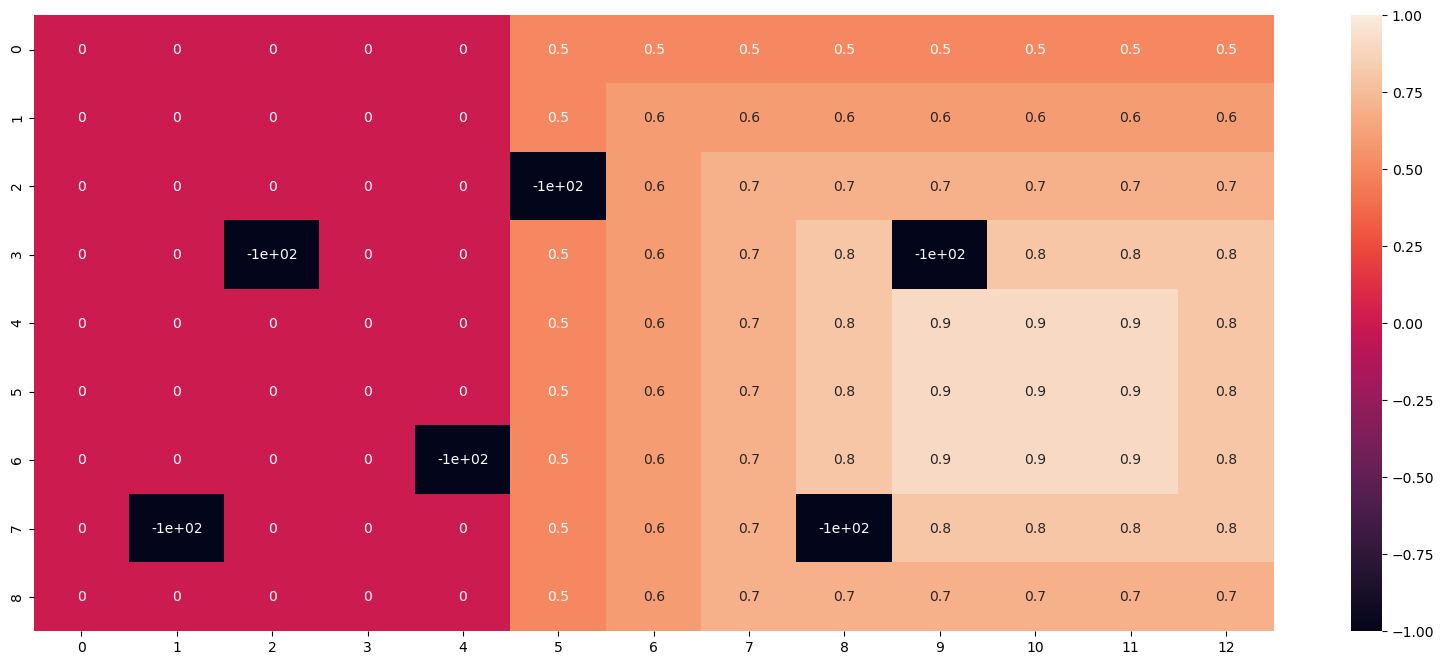

In [179]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_complex, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Simples

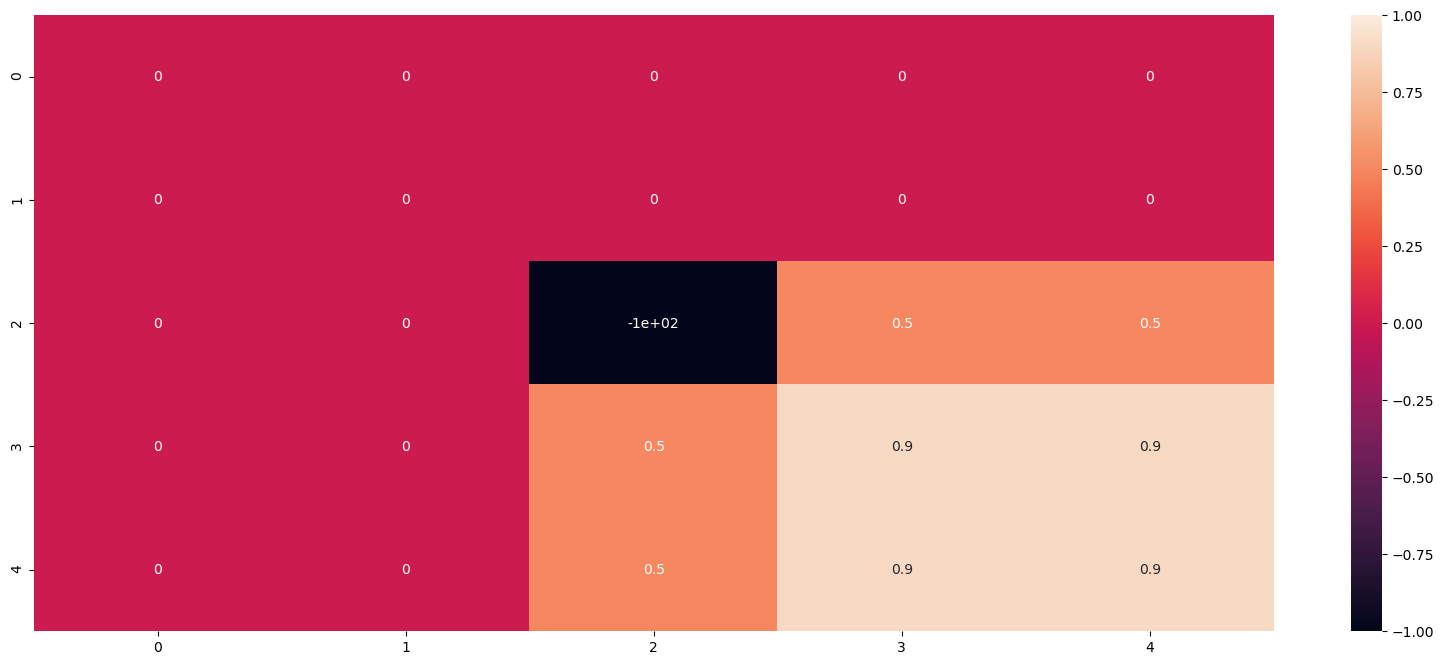

In [180]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Extra Simples

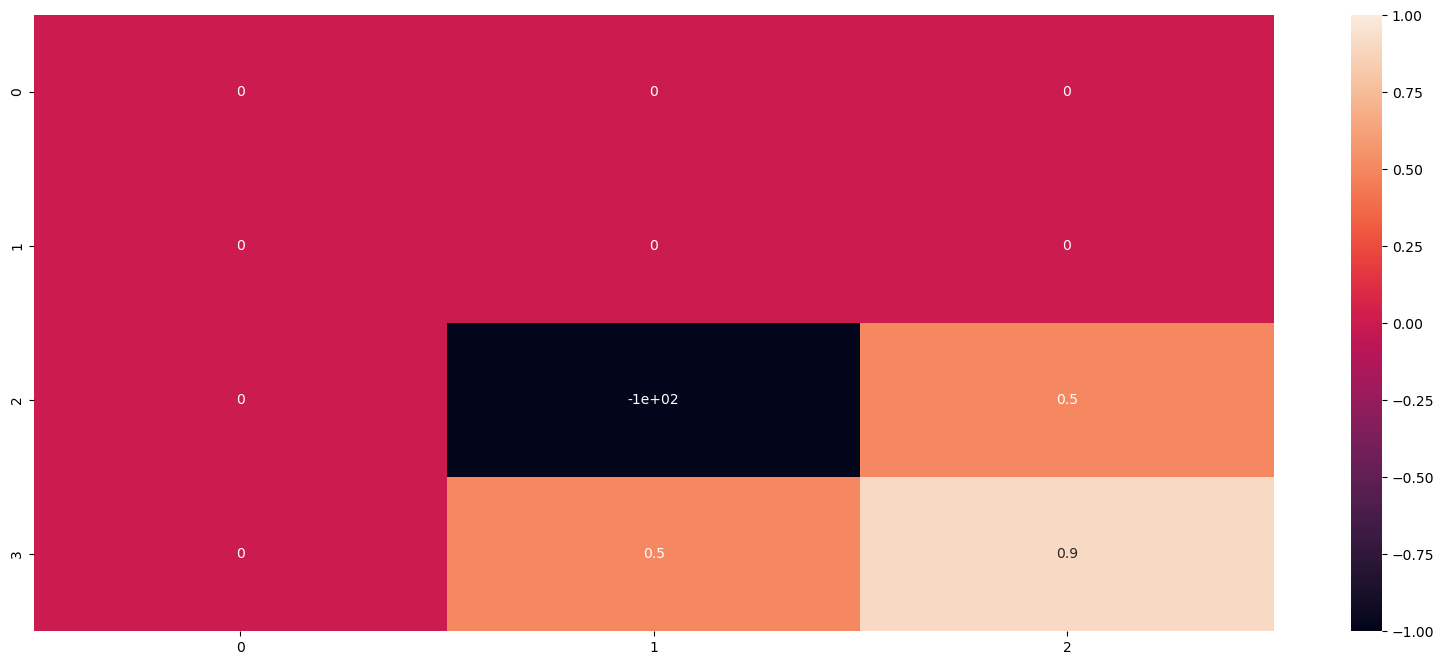

In [181]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_extra_simple, vmin=-1, vmax=1, annot=True)

## 2. Define Classes de Estado e Agente

In [182]:
# global variables
MATRIX_GAME = matrix_simple
START = (0, 0)
DETERMINISTIC = True

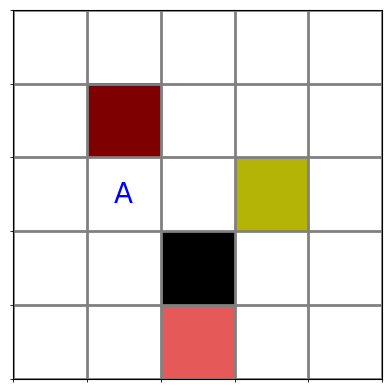

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the grid size
grid_size = 5

# Create a 2D numpy array to represent the grid
grid = np.zeros((grid_size, grid_size))

# Set some cells as blue and some as yellow
grid[1, 1] = 0.9
grid[2, 3] = 0.7
grid[4, 2] = 0.3
grid[2, 2] = -0.3
grid[3, 2] = -100

# Define the cell to mark with an 'X'
x_cell = (2, 1)

# Define the custom color map
# colormap red based
# cmap = (mpl.colors.ListedColormap([(0, 0, 0), (1, 1, 1), (0.9, 0, 0, 0.93), (0.7, 0, 0, 0.98), (0.5, 0, 0, 1)]))
cmap = (mpl.colors.ListedColormap([(0, 0, 0), (1, 1, 1), (0.9, 0.3, 0.3, 0.93), (0.7, 0.7, 0, 0.98), (0.5, 0, 0, 1)]))

bounds = [-100.1 ,-0.9, 0.2, 0.5, 0.8, 1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# Set up the color scale

# Plot the grid with the custom color map and the 'X' mark
fig, ax = plt.subplots()
im = ax.imshow(grid, cmap=cmap, norm=norm)

# Add the 'X' mark to the specified cell
ax.text(x_cell[1], x_cell[0], 'A', ha='center', va='center', color='blue', fontsize=20)

# Show the grid lines in grey
ax.set_xticks(np.arange(-.5, grid_size, 1), minor=True)
ax.set_yticks(np.arange(-.5, grid_size, 1), minor=True)
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

# Removendo rotulos dos eixos
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

plt.show()

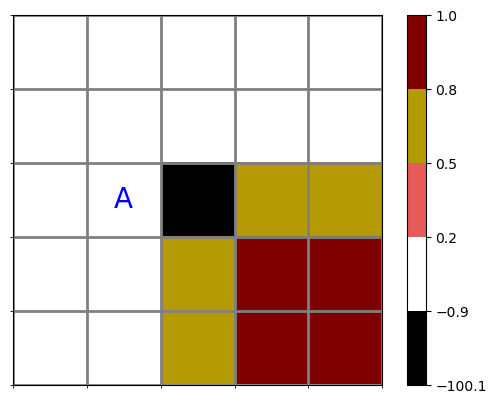

In [212]:
# Create a 2D numpy array to represent the grid
grid = matrix_simple

# Define the cell to mark with an 'X'
x_cell = (2, 1)

# Define the custom color map
cmap = (mpl.colors.ListedColormap([(0, 0, 0), (1, 1, 1), (0.9, 0.3, 0.3, 0.93), (0.7, 0.6, 0, 0.98), (0.5, 0, 0, 1)]))
# colormap red based
# cmap = (mpl.colors.ListedColormap([(0, 0, 0), (1, 1, 1), (0.9, 0, 0, 0.93), (0.7, 0, 0, 0.98), (0.5, 0, 0, 1)]))

# Define limites em que serão inseridas as cores definidas
bounds = [-100.1 ,-0.9, 0.2, 0.5, 0.8, 1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plot the grid with the custom color map
fig, ax = plt.subplots()
im = ax.imshow(grid, cmap=cmap, norm=norm)

# Add the 'A' mark to the specified cell
ax.text(x_cell[1], x_cell[0], 'A', ha='center', va='center', color='blue', fontsize=20)

# Show the grid lines in grey
ax.set_xticks(np.arange(-.5, grid.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, grid.shape[0], 1), minor=True)
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

plt.colorbar(im)

# Removendo rotulos dos eixos
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

plt.show()

# MODELO AULA

Pré processa imagens, verificar se tamanho de entrada e saida estao de acordo

In [ ]:
#!pip install scipy==1.1.0
#!pip install pygame
from __future__ import division, print_function
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from scipy.misc import imresize
import collections
import numpy as np
import os

import wrapped_game as wp
print(keras.__version__)

In [ ]:
def preprocess_images(images):
    if images.shape[0] < 4:
        # 1 imagem
        x_t = images[0]
        x_t = imresize(x_t, (80, 80))
        x_t = x_t.astype("float")
        x_t /= 255.0
        s_t = np.stack((x_t, x_t, x_t, x_t), axis=2)
    else:
        # 4 imagens
        xt_list = []
        for i in range(images.shape[0]):
            x_t = imresize(images[i], (80, 80))
            x_t = x_t.astype("float")
            x_t /= 255.0
            xt_list.append(x_t)
        s_t = np.stack((xt_list[0], xt_list[1], xt_list[2], xt_list[3]), 
                       axis=2)
    s_t = np.expand_dims(s_t, axis=0)
    return s_t

In [ ]:
def get_next_batch(experience, model, num_actions, gamma, batch_size):
    
    #seleciona amostra aleatória dentro de experience, do tamanho de batch_size. Inicialmente seleciona os indices
    batch_indices = np.random.randint(low=0, high=len(experience), size=batch_size)
    
    # Seleciona o batch de acordo com os indices
    batch = [experience[i] for i in batch_indices]

    #inicializa X e Y e o batch de acordo com os indices
    X = np.zeros((batch_size, 80, 80, 4)) # X-> Entrada da rede neural, com dimensões de acordo com função de pre processamento
    Y = np.zeros((batch_size, num_actions)) # Y-> Saída da rede neural, com dimensões de tamanho do batch e qtd de ações
    
    for i in range(len(batch)):
        # Seleciona os elementos dentro de cada instancia do batch de experiencia
        s_t, a_t, r_t, s_tp1, game_over = batch[i]
        # incorpora como X, cada um dos estados (imagens) selecionadas do batch
        X[i] = s_t
        # Preve qual a probabilidade das ações a serem realizadas para cada batch da experiencia
        Y[i] = model.predict(s_t)[0]

        # Realiza previsão para o próximo estado e seleciona ação com maior probabilidade
        Q_sa = np.max(model.predict(s_tp1)[0])
        if game_over:
            Y[i, a_t] = r_t
        else:
        # Atualiza o valor de Y, com valor atualizado de recompensa atual  + recomepnsa para o próximo estado
            Y[i, a_t] = r_t + gamma * Q_sa
    return X, Y

### Inicializa os parâmetros

Cada época corresponde a um único jogo ou episódio

In [ ]:

DATA_DIR = "../data"
NUM_ACTIONS = 3 # número de ações de saída que a rede pode enviar para o jogo (esquerda, faz nada, direita) (0, 1 e 2)

GAMMA =  0.99 # fator de desconto para recompensas futuras
#referem-se a valores iniciais e finais para o parâmetro em exploração de base
INITIAL_EPSILON = 1.0
FINAL_EPSILON = 0.001
MEMORY_SIZE =  1000 # tamanho da mamória de repetição de experiência
NUM_EPOCHS_OBSERVE = 200 #refere-se ao número de épocas onde a rede tem permissão para explorar o jogo , 
                            #enviando-lhe ações completamente aleatórias e vendo as recompensas
NUM_EPOCHS_TRAIN = 2000 #refere-se ao número de épocas em que a rede será submetida a treinamento on-line


BATCH_SIZE = 64 #tamanho do mini-lote que usaremos para treinamento
NUM_EPOCHS = NUM_EPOCHS_OBSERVE + NUM_EPOCHS_TRAIN #número total de jogos jogados para o treinamento

## DQN - Deep Q-Learning

<img src="DQN.png" />

## Pré processamento

A entrada vem em um conjunto de quatro 800 x 800 imagens, então a forma da entrada é (4, 800, 800). No entanto, a rede espera sua entrada como um tensor de forma quadrangular (tamanho do lote, 80, 80, 4). No começo do jogo, não temos quatro quadros, portanto, falsificamos o empilhamento do primeiro quadro quatro vezes. A forma do tensor de saída retornado dessa função é (80, 80, 4).


A única diferença é o tamanho da entrada e da saída. Nossa forma de entrada é (80, 80, 4) enquanto a deles (Deep Mind) era (84, 84, 4) e nossa saída é (3) correspondente às três ações para as quais o valor da função Q precisa ser computado, enquanto que elas foram (18), correspondente às ações possíveis da Atari.

In [ ]:
def preprocess_images(images):
    if images.shape[0] < 4:
        # 1 imagem
        x_t = images[0]
        x_t = imresize(x_t, (80, 80))
        x_t = x_t.astype("float")
        x_t /= 255.0
        s_t = np.stack((x_t, x_t, x_t, x_t), axis=2)
    else:
        # 4 imagens
        xt_list = []
        for i in range(images.shape[0]):
            x_t = imresize(images[i], (80, 80))
            x_t = x_t.astype("float")
            x_t /= 255.0
            xt_list.append(x_t)
        s_t = np.stack((xt_list[0], xt_list[1], xt_list[2], xt_list[3]), 
                       axis=2)
    s_t = np.expand_dims(s_t, axis=0)
    return s_t

In [ ]:
batch_size=20
num_actions=3
import numpy as np

Y = np.zeros((batch_size, num_actions))


In [ ]:
Y[0]

array([0., 0., 0.])

In [ ]:
def get_next_batch(experience, model, num_actions, gamma, batch_size):
    
    #amostra aleatória
    batch_indices = np.random.randint(low=0, high=len(experience), size=batch_size)
        
    #inicializa X e Y e o batch de acordo com os indices
    
    batch = [experience[i] for i in batch_indices]
    
    X = np.zeros((batch_size, 80, 80, 4))
    Y = np.zeros((batch_size, num_actions))
    
    for i in range(len(batch)):
        s_t, a_t, r_t, s_tp1, game_over = batch[i]
        X[i] = s_t
        Y[i] = model.predict(s_t)[0]
        Q_sa = np.max(model.predict(s_tp1)[0])
        if game_over:
            Y[i, a_t] = r_t
        else:
            Y[i, a_t] = r_t + gamma * Q_sa
    return X, Y

### Inicializa os parâmetros

Cada época corresponde a um único jogo ou episódio

In [ ]:

DATA_DIR = "../data"
NUM_ACTIONS = 3 # número de ações de saída que a rede pode enviar para o jogo (esquerda, faz nada, direita) (0, 1 e 2)

GAMMA =  0.99 # fator de desconto para recompensas futuras
#referem-se a valores iniciais e finais para o parâmetro em exploração de base
INITIAL_EPSILON = 1.0
FINAL_EPSILON = 0.001
MEMORY_SIZE =  1000 # tamanho da mamória de repetição de experiência
NUM_EPOCHS_OBSERVE = 200 #refere-se ao número de épocas onde a rede tem permissão para explorar o jogo , 
                            #enviando-lhe ações completamente aleatórias e vendo as recompensas
NUM_EPOCHS_TRAIN = 2000 #refere-se ao número de épocas em que a rede será submetida a treinamento on-line


BATCH_SIZE = 64 #tamanho do mini-lote que usaremos para treinamento
NUM_EPOCHS = NUM_EPOCHS_OBSERVE + NUM_EPOCHS_TRAIN #número total de jogos jogados para o treinamento

### constrói um modelo

Existem três camadas convolucionais e duas camadas totalmente conectadas (Dense). Todas as camadas, exceto a última, possuem a unidade de ativação ReLU. Como estamos prevendo valores de funções Q, temos uma rede de regressão e a última camada não possui unidade de ativação.

A função de perda é a diferença quadrática entre o valor atual de Q (s, a) e seu valor calculado em termos da soma da recompensa e do valor Q descontado Q (s ', a') um passo no futuro, então a função de perda é a de erro quadrado médio (MSE).

Adam -> um bom otimizador de propósito geral, instanciado com uma baixa taxa de aprendizado.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=8, strides=4,
                 kernel_initializer="normal",
                 padding="same",
                 input_shape=(80, 80, 4)))
model.add(Activation("relu"))
model.add(Conv2D(64, kernel_size=4, strides=2, 
                 kernel_initializer="normal",
                 padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, kernel_size=3, strides=1,
                 kernel_initializer="normal",
                 padding="same"))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(512, kernel_initializer="normal"))
model.add(Activation("relu"))

model.add(Dense(3, kernel_initializer="normal"))

model.compile(optimizer=Adam(lr=1e-6), loss="mse")

###### game, file para salvar, inicializa epsilon 

In [ ]:
game = wp.MyWrappedGame()
experience = collections.deque(maxlen=MEMORY_SIZE)

fout = open("rl-network-results_2.tsv", "w")
num_games, num_wins = 0, 0
epsilon = INITIAL_EPSILON

NameError: name 'wp' is not defined

## Treino

Um jogo corresponde a um único episódio de uma bola que cai do teto e está sendo pego pela pá ou está sendo perdido. A perda é a diferença quadrática entre o valor Q previsto e real para o jogo.

Se estivermos no modo de observação, vamos apenas gerar um número aleatório correspondente a um de nossas ações, caso contrário, usaremos a exploração para selecionar uma ação aleatória ou usar nossa rede neural (que também estamos treinando) para prever a ação que devemos enviar.

Quando a rede é relativamente não treinada, suas previsões não são muito boas, então faz sentido explorar o espaço de estados mais em um esforço para reduzir as chances de ficar preso em um mínimo local. No entanto, à medida que a rede é cada vez mais treinada, reduzimos o valor de forma gradual para que o modelo consiga prever mais e mais ações que a rede envia para o jogo.



In [ ]:
for e in range(NUM_EPOCHS):
    #restabelecemos o estado do jogo neste momento (cada época é um jogo)
    loss = 0.0
    game.reset()

    # pega o primeiro estado
    a_0 = 1  # (0 = esquerda, 1 = faz nada, 2 = direita)
    x_t, r_0, game_over = game.step(a_0) 
    s_t = preprocess_images(x_t)

    while not game_over:
        s_tm1 = s_t #guarda estado atual
        #  próxima ação
        if e <= NUM_EPOCHS_OBSERVE:
            a_t = np.random.randint(low=0, high=NUM_ACTIONS, size=1)[0]
        else:
            if np.random.rand() <= epsilon:
                a_t = np.random.randint(low=0, high=NUM_ACTIONS, size=1)[0]
            else:
                q = model.predict(s_t)[0]
                a_t = np.argmax(q)

        # faz a ação, pega a recompensa
        x_t, r_t, game_over = game.step(a_t)
        s_t = preprocess_images(x_t)
        # se for recompensado, incrementa numero de vitorias
        if r_t == 1:
            num_wins += 1          
                        
        # guarda a experiência
        experience.append((s_tm1, a_t, r_t, s_t, game_over))  #(estado, ação, recompensa, novo estado, fim) 
        
        ### Se memoria cheia, remove o primeiro elemento
        if len(experience) > MEMORY_SIZE:
                experience = experience[1:]

        if e > NUM_EPOCHS_OBSERVE:
            # acaba abservação, começa o treinamento
            # calcula gradiente descendente
            X, Y = get_next_batch(experience, model, NUM_ACTIONS, 
                                      GAMMA, BATCH_SIZE)
            
            loss += model.train_on_batch(X, Y)

    
    # reduz o epsilon
    if epsilon > FINAL_EPSILON:
        epsilon -= (INITIAL_EPSILON - FINAL_EPSILON) / NUM_EPOCHS
        
    
    #Prints e Saves
    print("Epoca {:04d}/{:d} | Perda {:.5f} | Vezes ganhas: {:d} | epsilon {:.5f}"
            .format(e + 1, NUM_EPOCHS, loss, num_wins, epsilon))
    fout.write("{:04d}\t{:.5f}\t{:d}\n"
            .format(e + 1, loss, num_wins))
               
    # só para salvar estado atual do modelo em um arquivo               
    if e % 100 == 0:
        model.save("rl-network_2.h5", overwrite=True)
        
        
fout.close()
#salva modelo final pra nao precisar executar novamente
model.save("rl-network_2.h5", overwrite=True)

# MODELO ANTERIOR

ALTERAR PARA SALVAR O SHOWBOARD A CADA AÇÃO
ALTERAR PARA SALVAR A FUNCAO DE VALOR A CADA ACAO
O NOME DO ARQUIVO SALVO DEVE CONTER A DATA HORA DO INICIO DO JOGO E O NUMERO DO JOGO (0, 1, 2, 3...)

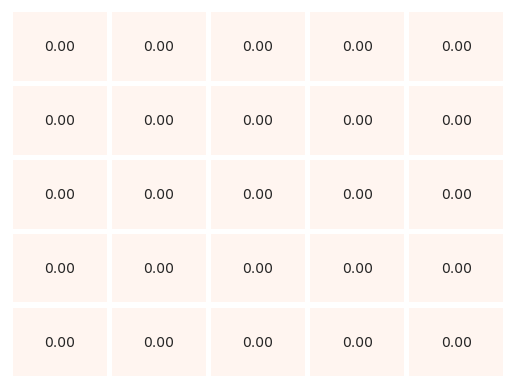

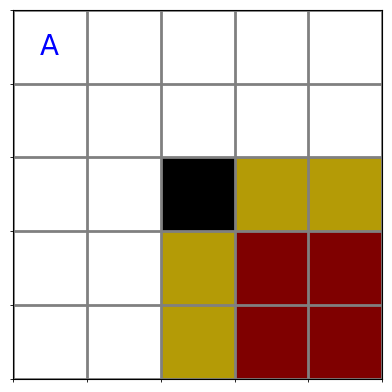

FileNotFoundError: [Errno 2] No such file or directory: 'Resultados_DQL\\Resultados_DQL\\Imagens_Vtable\\vtable_game_0_07-Mar-2023_09-00.png'

In [247]:
class State:
    # Inicializa estado do jogo
    def __init__(self, state=START, matrix_game=MATRIX_GAME):

        # Matriz inicial de recompensas:
        self.ini_reward_matrix = matrix_game

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define o estado do jogo atual. Inicialmente é igual ao parâmetro START
        self.state = state

        # Define variável de termino do jogo como False
        self.isEnd = False

    # Caso perca ou ganhe o jogo, atualiza o estado para fim
    def isEndFunc(self, count):
        if count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == "down":
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == "left":
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)

        # Se estado é legal, próximo estado, caso contrário, permanece no mesmo
        if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                if self.board[nxtState]!= -100:
                    return nxtState
        return self.state

    # Mostra tabuleiro
    def showBoard(self, reds=False, colorbar=False):

        # Define the custom color map

        if reds==False:
            cmap = (mpl.colors.ListedColormap([(0, 0, 0), (1, 1, 1), (0.9, 0.3, 0.3, 0.93), (0.7, 0.6, 0, 0.98), (0.5, 0, 0, 1)]))
        else:
            # colormap red based
            cmap = (mpl.colors.ListedColormap([(0, 0, 0), (1, 1, 1), (0.9, 0, 0, 0.93), (0.7, 0, 0, 0.98), (0.5, 0, 0, 1)]))

        # Define limites em que serão inseridas as cores definidas
        bounds = [-100.1 ,-0.9, 0.2, 0.5, 0.8, 1]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

        # Plot the grid with the custom color map
        fig, ax = plt.subplots()
        im = ax.imshow(self.ini_reward_matrix, cmap=cmap, norm=norm)

        # Add the 'A' mark to the specified cell
        ax.text(self.state[1], self.state[0], 'A', ha='center', va='center', color='blue', fontsize=20)

        # Show the grid lines in grey
        ax.set_xticks(np.arange(-.5, self.ini_reward_matrix.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-.5, self.ini_reward_matrix.shape[0], 1), minor=True)
        ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

        if colorbar==True:
            plt.colorbar(im)
        # Removendo rotulos dos eixos
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)

        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)

        plt.show()
    def showMatrix(self):
        sns.heatmap(self.ini_reward_matrix, vmin=-1, vmax=1, annot=True)
        

# Agent of player

class Agent:

    def __init__(self, matrix_game=MATRIX_GAME):

        # Matriz inicial com recompensas pré definidas:
        self.ini_reward_matrix = matrix_game

        # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Inicializa vetor de estados
        self.states = [START]

        # Recompensa Total
        self.total_reward = 0

        # Inicializa vetor de ações
        self.actions = ["up", "down", "left", "right"]

        # Inicializa classe estado
        self.State = State()

        # Define lr e exp_rate
        self.lr = 0.2 # Learning Rate: Grau de atualização de peso para estado/ação atual
        self.exp_rate = 0.3 # Exploration Rate: Percentual de vezes em que é tomada uma ação aleatória ao invés de seguir ação de maior recompensa na tabela Q
        self.gamma = 0.95 # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
        self.d_f = 0.99 # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos

        # Inicializa tabela Q
            # Cria listas para cada item da coluna e da linha e combina cada item em tuplas:
        unique_combinations=list(itertools.product(np.arange(0, self.ini_reward_matrix.shape[0], 1), np.arange(0, self.ini_reward_matrix.shape[1], 1)))
            # Cria tabela q zerada:
        self.qtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))), index=unique_combinations, columns=self.actions)

        #Inicializa tabela R
            # Cria tabela de recompensas imediatas:
        self.rtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))), index=unique_combinations, columns=self.actions)
            # Enriquece tabela r com recompensas imediatas pre definidas:
        for position in self.rtable.index:
            #up
            if position[0]!=0: #Se movimento for valido
                self.rtable.loc[position, 'up'] = self.ini_reward_matrix[position[0]-1, position[1]]
            #down
            if position[0]<self.ini_reward_matrix.shape[0]-1: #Se movimento for valido
                self.rtable.loc[position, 'down'] = self.ini_reward_matrix[position[0]+1, position[1]]
            #right
            if position[1]<self.ini_reward_matrix.shape[1]-1: #Se movimento for valido
                self.rtable.loc[position, 'right'] = self.ini_reward_matrix[position[0], position[1]+1]
            #left
            if position[1]!=0: #Se movimento for valido
                self.rtable.loc[position, 'left'] = self.ini_reward_matrix[position[0], position[1]-1]

        # Cria tabela de função de valor zerada:
        self.vtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1])))

        # Vetor com recompensas. Inicializa com recompensa referente ao início do jogo
        self.rewards = [float(self.ini_reward_matrix[START])]

        # Listas em que serão armazenadas principais informações
        self.game_list = []
        self.time_steps_list = []
        self.time_list = []
        self.states_list = []
        self.total_rewards_list = []
        self.rewards_list = []
        self.vtable_list = []
        self.qtable_list = []
        self.state_reward_list = []

        # Inicializa tempo
        self.t1=time.time()

        self.isEnd = False
    # Escolhe uma ação
    def chooseAction(self):
        # Inicializa variáveis
        mx_nxt_reward = 0
        action = ""

        # Se valor aleatório for menor que taxa de exp_rate escolhida, escolhe ação aleatória
        if np.random.uniform(0, 1) <= self.exp_rate:  
            # Escolhe ação aleatória
            action = np.random.choice(self.actions)

        # Caso contrário, escolhe ação de acordo com estado com maior valor
        else:
            # Seleciona ação que maximiza tabela Q
            # Greedy action
            mx_nxt_reward=0
            for a in self.actions:
                # verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward

        # Caso tenham duas ou mais ações empatadas com maior valor, escolhe uma aleatoriamente
            equal_actions=[]
            for a in self.actions:
                # Verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward == mx_nxt_reward:
                    equal_actions.append(a)
            action = np.random.choice(equal_actions)
        return action

    # Realiza ação
    def takeAction(self, action):
        # Altera posição atual com base na ação tomada
        position = self.State.nxtPosition(action)

        # Retorna a posição atual, depois de realizar ação
        return State(state=position)
    
    def isEndFunc(self):
        # Caso estado atual seja maior que 0 e ainda não tenha sido percorrido, reduz contador em 1
        if (self.State.state not in self.states[:-1]) and (self.ini_reward_matrix[self.State.state]>0):
            self.count-=1

        # Se contador é igual a zero, jogo termina
        if self.count == 0:
            self.isEnd = True

    # Update Q table
    def updateQtable(self, action):
        # Caso já tenha passado por esse estado previamente, considera recompensa como zero
        if self.State.nxtPosition(action) in (self.states):
            r=0
        else:
            # Realiza update na tabela Q usando recompensa descontada pela quantidade de passos realizados
            r = float(self.rtable.loc[[self.State.state]][action])*(self.d_f**(len(self.states)-1))

        # Realiza update no vetor de recompensas
        self.rewards.append(r)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        self.qtable.at[self.State.state, action] = self.qtable.loc[[self.State.state]][action]+ \
                                            self.lr * (r + self.gamma * np.max(self.qtable.loc[[self.State.nxtPosition(action)]].values) - \
                                                self.qtable.loc[[self.State.state]][action])

    def calculateValuefunc(self):
        # Cria tabela com função de valor zerada
        self.vtable = pd.DataFrame(np.zeros((matrix_extra_simple.shape[0], matrix_extra_simple.shape[1])))

        # Enriquece tabela de função de valor com valores máximos da tabela q
        for row in self.qtable.index:
            self.vtable.at[row[0], row[1]] = np.max(self.qtable.loc[[row]].values)
        return self.vtable
    
    # Reinicia o jogo
    def reset(self):
        # Reinicia listas de estados percorridos e recompesas 
        self.states = [START]
        self.rewards = [float(self.ini_reward_matrix[START])]
        self.state_reward_dict=[]
        self.total_reward = 0

        #Reinicia classe de estado
        self.State = State()
        # Reinicia contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]
        # Reinicia tempo de cada jogo
        self.t1 = time.time()

        self.isEnd = False

    # Salva informações de cada jogo em listas
    def save_info(self, i, time):

        # Armazena número do jogo em lista
        self.game_list.append(i)

        # Armazena quantidade de passos percorridos em lista
        self.time_steps_list.append(len(self.states))

        # Armazena tempo total de cada jogo em lista
        self.time_list.append(time)

        # Armazena lista de estados percorridos em lista
        self.states_list.append(self.states)

        # Armazena recompensa total do jogo em lista
        self.total_rewards_list.append(np.sum(self.rewards))

        # Armazena recompensas de cada estado em lista
        self.rewards_list.append(self.rewards)

        # Armazena vtable em lista 
        self.vtable_list.append(self.calculateValuefunc().to_dict('dict'))

        # Armazena tabela Q em lista
        self.qtable_list.append(self.qtable.to_dict('dict'))

        # Armazena cada par de estado/recompensa em lista de listas
        self.state_reward_dict = list(zip(self.states, self.rewards))
        self.state_reward_list.append(self.state_reward_dict)

    def generate_result_file(self):

        # Cria dataframe e armazena listas com info de cada jogo em colunas
        arquivo_final = pd.DataFrame()
        arquivo_final['JOGO'] = self.game_list
        arquivo_final['TIMESTEPS'] = self.time_steps_list
        arquivo_final['TIME'] = self.time_list
        arquivo_final['STATES'] = self.states_list
        arquivo_final['REWARDS'] = self.rewards_list
        arquivo_final['STATES_REWARDS'] = self.state_reward_list      
        arquivo_final['TOTAL REWARDS'] = self.total_rewards_list
        arquivo_final['Vtable'] = self.vtable_list
        arquivo_final['Qtable'] = self.qtable_list

        # Exporta resultado para arquivo csv
        arquivo_final.to_csv(r'Resultados_DQL\Resultados_DQL_'+time.strftime('%d-%b-%Y_%H-%M', time.localtime())+'.csv')

    def play(self, rounds=10):
        # Inicializa contador de jogos
        i = 0

        # Joga n partidas
        while i < rounds:
            if self.isEnd==False:

                # Escolhe uma ação
                action = self.chooseAction()

                #Update na tabela Q
                self.updateQtable(action)

                # appenda no vetor de estados
                self.states.append(self.State.nxtPosition(action))

                # Realiza a ação, atualiza o estado
                self.State = self.takeAction(action)

                #Salva figuras
                self.save_figs(i)

                # Reduz contador caso estado atual>0. Caso contador=0, jogo termina
                self.isEndFunc()

            if self.isEnd==True:
                #Finaliza tempo de duração do jogo
                duracao_jogo = (time.time()-self.t1)

                #Printa tempo
                print('game ' ,i, ' ended in:')
                print(duracao_jogo)

                # Salva informações em listas
                self.save_info(i=i, time=duracao_jogo)

                # Reseta jogo atual e segue para próximo jogo
                self.reset()
                i += 1
        
        # Gera Arquivo com Resultados
        self.generate_result_file()

    # Mostra resultados em formato de heatmap
    def save_figs(self, i):
        vtalbe_plot = sns.heatmap(self.calculateValuefunc(), annot=True, fmt=".2f", cmap=sns.color_palette("Reds", as_cmap=True), cbar= False, linewidths=3, xticklabels=False, yticklabels=False)
        game_plot = self.State.showBoard(reds=False, colorbar=False)

        # Salvando Figuras
        vtalbe_plot.figure.savefig(r'Resultados_DQL\Resultados_DQL\Imagens_Vtable\vtable'+'_game_'+str(i)+'_'+time.strftime('%d-%b-%Y_%H-%M', time.localtime())+'.png')
        game_plot.figure.savefig(r'Resultados_DQL\Resultados_DQL\Imagens_Game\game_table'+'_game_'+str(i)+'_'+time.strftime('%d-%b-%Y_%H-%M', time.localtime())+'.png')

    def showValues(self):
        #sns.diverging_palette(220, 20, as_cmap=True)
        sns.heatmap(self.calculateValuefunc(), annot=True, fmt=".2f", cmap=sns.color_palette("Reds", as_cmap=True), cbar= False, linewidths=3, xticklabels=False, yticklabels=False)
        self.State.showBoard(reds=False, colorbar=False)
        print(self.calculateValuefunc())

if __name__ == "__main__":
    ag = Agent()
    ag.play(2)
    print(ag.showValues())